####  Сглаживание с помощью сопряженной функции

Предположим, что функция $f$ имеет следующее представление:

$$f(x) = \sup_{y \in Q} y^T(Ax+b) - \phi(y) = \phi^*(Ax+b)$$

Рассмотрим неотрицательную _прокс-функцию_ $d$ множества $Q$. Эта функция непрерывна и $\beta$-сильно выпукла на $Q$. Обозначим через $y_d = \arg\min_{y \in Q} d(y)$ ее _прокс-центр_. Не ограничивая общности считаем, что $d(y_d) = 0$.

Примеры:

$d(y) = \|y - y_0\|^2$

$d(y) = r(y) - r(y_0) + \nabla r(y_0)^T(y - y_0)$, где $r(y)$ яввляется 1-сильно выпуклой на $Q$. 


Выберем положительное $\mu$ в качестве _параметра сглаживания_. Рассмотрим функцию:

$$ f_{\mu}(x) = \sup_{y \in Q} y^T(Ax+b) - \phi(y) - \mu d(y) = \left(\phi^* + \mu d \right)^* (Ax + b)$$

Обозначим через $y_*$ решение этой задачи. Поскольку функция $d$ сильно выпукла, это решение единственно.

Тогда функция $f_{\mu}$ будет выпуклой и непрерывно дифференцируемой, а ее градиент вычисляется по формуле

$$\nabla f_{\mu}(x) = A^T y_*$$

и является непрерывным по Липшицу с константой $\frac{1}{\mu}\|A\|_2^2$.

Если множество $Q$ является ограниченным, то

$$ f_{\mu}(x) \leq f(x) \leq f_{\mu}(x) + \mu D $$

где $D = \max_{y \in Q} d(y)$.

http://www.seas.ucla.edu/~vandenbe/236C/lectures/smoothing.pdf

Пример 1:

Целевая функция: $f(x) = |x| = \sup_{|y|\leq 1} yx$

Прокс функция: $d(y) = \frac{1}{2}y^2$

Сглаженная функция: $f_{\mu}(x) = \sup_{|y|\leq 1} yx - \frac{\mu}{2}y^2 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt

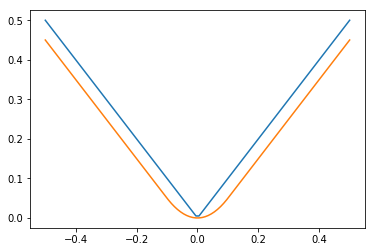

In [2]:
x = np.linspace(-0.5, 0.5, 100)

mu = 0.1

y = np.array([t**2/(2*mu) if np.abs(t)<=mu else np.abs(t) - mu/2 for t in x]) # YOUR CODE

plt.plot(x, np.abs(x))
plt.plot(x, y)

Пример 2: минимизация поточечного максимума функций

Пусть целевая функция представлена в виде $f(x) = \max\{f_1(x), f_2(x), ..., f_m(x)\}$.

Воспользуется тем, что максимум можно представить как максимизацию линейной функции на стандартном симплексе: 

$$\max\{c_1, c_2, ..., c_m\} = \max_{y \in \Delta} c^Ty$$

где $c^T = [c_1, c_2, ..., c_m]$ и $\Delta = \{y|1^Ty \leq 1, y_i\geq 0\}$

В связи с этим наблюдением, запишем целевую функцию как $f(x) = \max_{y \in \Delta} c_x^Ty$, где $c_x^T = [f_1(x), f_2(x), ..., f_m(x)]$ - вектор значений данных функций в точке $x$.

В качестве прокс-функции будем использовать $d(y) = \log m + \sum_{i=1}^m y_i \log y_i$. Ее максимальное значение на симплексе равно $D = \max_{y \in \Delta} d(y) = \log m$.

Сглаженная функция:

$$ f_{\mu}(x) = \sup_{y \in \Delta} c_x^Ty - \mu d(y) = -\mu \log m + \sup_{y \in \Delta} \left\{ c_x^Ty - \mu \sum_{i=1}^m y_i \log y_i \right\} $$

Используя тот факт, что функции $-\mathcal{H}(y) = \sum_{i=1}^m y_i \log y_i $ и $\mathrm{logsumexp}(x) = \log \sum_{i=1}^m \exp x_i$ являются сопряженными, а также свойство $(a f)^*(x) = a f^*(\frac{x}{a})$, получаем:

$$ f_{\mu}(x) = -\mu \log m + \mu \log \sum_{i=1}^m e^{\frac{f_i(x)}{\mu}}$$

$$ \nabla f_{\mu}(x) = \mathrm{softmax}(\mu^{-1}x)$$

где $\mathrm{softmax}(z)_i = \frac{\exp(z_i)}{\sum_{i=1}^m \exp(z_i)} = \exp(z_i - \mathrm{logsumexp}(z))$.

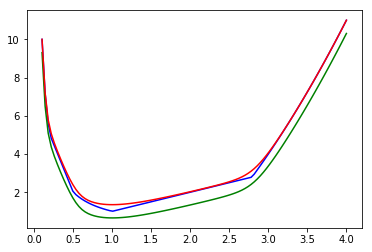

In [3]:
from scipy.special import logsumexp

f1 = lambda x: x
f2 = lambda x: 1/x
f3 = lambda x: -10*x + 7
f4 = lambda x: x**2 - 5

functions = [f1, f2, f3, f4]

m = len(functions)

f_obj = lambda x: max([f(x) for f in functions])

x = np.linspace(0.1, 4, 100)
y = np.array([f_obj(t) for t in x])
plt.plot(x, y, 'b')

mu = 0.5

y_smoothed = -mu*np.log(m) + mu*np.array([logsumexp(np.array([f(t)/mu for f in functions])) for t in x]) # YOUR CODE

# lower bound
plt.plot(x, y_smoothed, 'g')

# upper bound
D = np.log(m)
plt.plot(x, y_smoothed + mu*D, 'r')